# OONI Data Analysis - Preliminary Exploration

In [1]:
# Imports
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import os

In [2]:
# Plot configuration
seaborn.set_style('dark')

## (1) Data Cleaning
In this step we load and clean up the pre-procsesed data in order to get it into a form that can be analyzed.

In [3]:
# Load the pre-processed data and set up the index based on date
data_dir = '../../Data/BY/processed/2022/'
web_connectivity = pd.read_csv(os.path.join(data_dir, 'webconnectivity.csv'))
web_connectivity['date'] = pd.to_datetime(web_connectivity['date'])
web_connectivity = web_connectivity.set_index('date')
web_connectivity

,probe_asn,control_failure,body_length_match,accessible,input,resolver_asn,dns_consistency,x_null_null_flags,status_code_match,title_match,blocking,dns_experiment_failure,x_blocking_flags,x_dns_flags,body_proportion,http_experiment_failure,headers_match
date,,,,,,,,,,,,,,,,,
2022-01-01,AS42772,NaN,True,True,https://cc.bingj.com/cache.aspx?q=nothing,AS42772,consistent,NaN,True,NaN,False,NaN,NaN,NaN,1.0,NaN,True
2022-01-01,AS42772,NaN,True,True,https://coronavirus.app/,AS42772,consistent,NaN,True,True,False,NaN,NaN,NaN,1.0,NaN,True
2022-01-01,AS42772,NaN,NaN,True,https://hootsuite.com/,AS42772,consistent,NaN,True,NaN,False,NaN,NaN,NaN,0.0,NaN,True
2022-01-01,AS42772,NaN,True,True,http://www.akdn.org/,AS42772,inconsistent,NaN,True,True,False,NaN,NaN,NaN,1.0,NaN,True
2022-01-01,AS42772,NaN,True,True,http://www.allminsk.biz/,AS42772,consistent,NaN,True,False,False,NaN,NaN,NaN,1.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,AS6697,NaN,True,True,http://www.granma.cu/,AS6697,consistent,NaN,True,True,False,NaN,NaN,NaN,1.0,NaN,True
2022-12-31,AS6697,NaN,True,True,https://www.grindr.com/,AS6697,consistent,NaN,True,True,False,NaN,NaN,NaN,1.0,NaN,True
2022-12-31,AS6697,NaN,True,True,https://www.guerrillagirls.com/,AS6697,consistent,NaN,True,True,False,NaN,NaN,NaN,1.0,NaN,True


In [4]:
# Filter data into specific blocking methods
dns_events = web_connectivity[web_connectivity['blocking'] == 'dns']
httpdiff_events = web_connectivity[web_connectivity['blocking'] == 'http-diff']
httpfail_events = web_connectivity[web_connectivity['blocking'] == 'http-failure']
tcp_events = web_connectivity[web_connectivity['blocking'] == 'tcp_ip']
web_connectivity['blocking'].unique()

array(['False', 'dns', 'http-diff', nan, 'tcp_ip', 'http-failure'],
      dtype=object)

## (2) Data Exploration

In [5]:
# Compute rolling totals
k=7
total_events = web_connectivity.groupby(web_connectivity.index).size().rolling(window=k).sum().dropna()
total_dns = dns_events.groupby(dns_events.index).size().rolling(window=k).sum().dropna()
total_httpdiff = httpdiff_events.groupby(httpdiff_events.index).size().rolling(window=k).sum().dropna()
total_httpfail = httpfail_events.groupby(httpfail_events.index).size().rolling(window=k).sum().dropna()
total_tcp = tcp_events.groupby(tcp_events.index).size().rolling(window=k).sum().dropna()

In [6]:
# Compute fractional events
frac_dns = total_dns/total_events
frac_httpdiff = total_httpdiff/total_events
frac_httpfail = total_httpfail/total_events
frac_tcp = total_tcp/total_events
frac_dns = frac_dns.fillna(0)
frac_httpdiff = frac_httpdiff.fillna(0)
frac_httpfail = frac_httpfail.fillna(0)
frac_tcp = frac_tcp.fillna(0)

Text(0.5, 1.0, 'Fractional Blocking Events Over Time (k=7)')

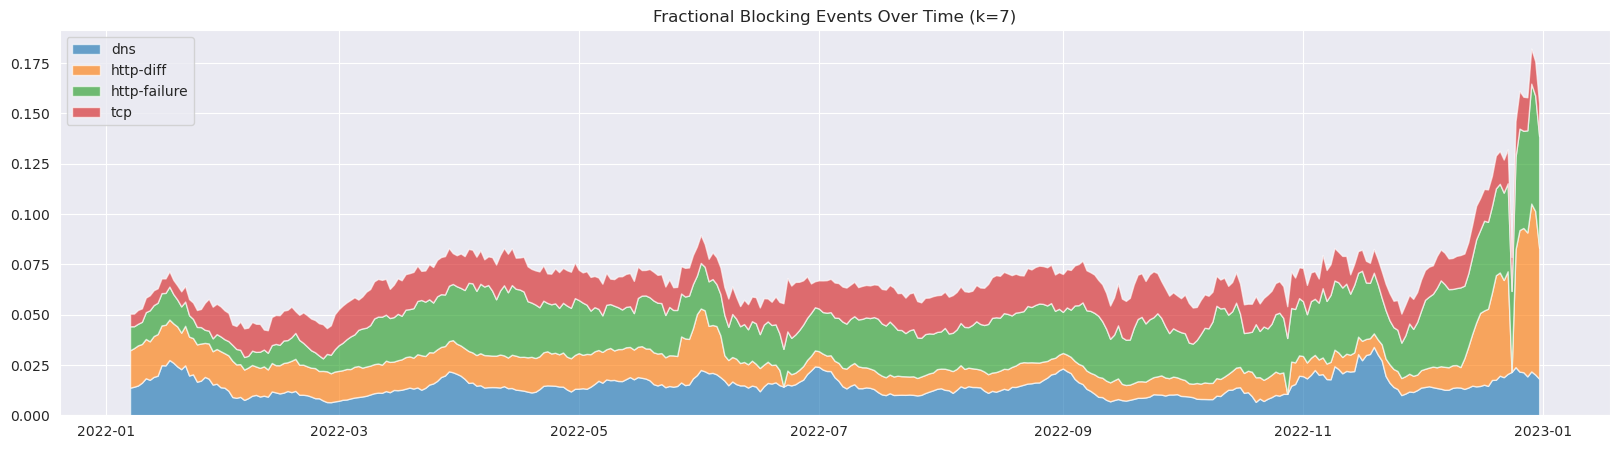

In [7]:
# Plot fractional events
plt.rcParams['figure.figsize'] = [20, 5]
plt.stackplot(total_events.index, frac_dns, frac_httpdiff, frac_httpfail, frac_tcp, labels=['dns', 'http-diff', 'http-failure', 'tcp'], alpha=0.65)
plt.legend()
plt.grid()
plt.title(f'Fractional Blocking Events Over Time (k={k})')

Text(0.5, 1.0, 'Fractional Blocking Events From 2022-03-01-2022-05-01 (k=7)')

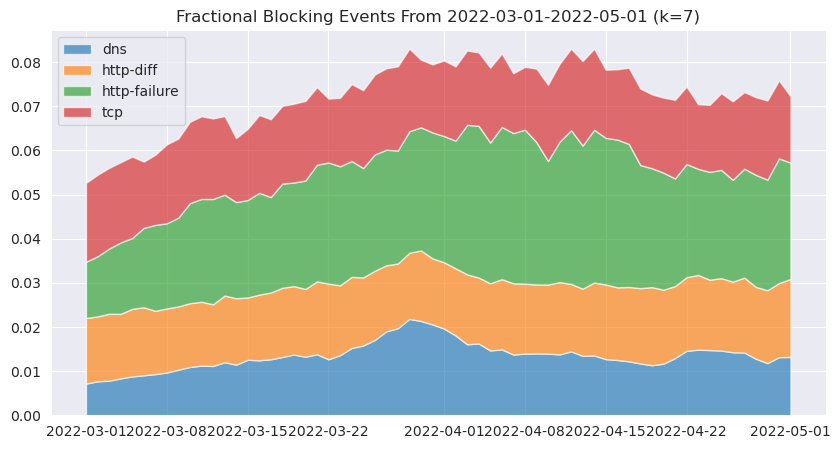

In [8]:
# Zoom in on a region of interest
start_date = '2022-03-01'
end_date = '2022-05-01'
filter_range = total_events.index[(total_events.index >= start_date) & (total_events.index <= end_date)]
plt.rcParams['figure.figsize'] = [10, 5]
plt.stackplot(filter_range, frac_dns[filter_range], frac_httpdiff[filter_range], frac_httpfail[filter_range], frac_tcp[filter_range], labels=['dns', 'http-diff', 'http-failure', 'tcp'], alpha=0.65)
plt.legend()
plt.grid()
plt.title(f'Fractional Blocking Events From {start_date}-{end_date} (k={k})')

In [9]:
# Extract known blocking methods
web_maybe_blocked = web_connectivity.loc[(web_connectivity['blocking'] != 'False') & (~web_connectivity['blocking'].isnull())]
web_maybe_blocked = web_maybe_blocked.sort_values(by=["input", "date"])
wmbi = web_maybe_blocked.set_index(['input', web_maybe_blocked.index])
wmbi

probe_asn  \
input                                        date                   
http://128.31.0.39:9131/tor/server/authority 2022-01-26   AS42772   
                                             2022-01-26    AS6697   
                                             2022-01-26    AS6697   
                                             2022-01-26   AS42772   
                                             2022-01-26   AS42772   
...                                                           ...   
https://zubr.in/                             2022-12-30    AS6697   
                                             2022-12-30    AS6697   
                                             2022-12-31    AS6697   
                                             2022-12-31    AS6697   
                                             2022-12-31    AS6697   

                                                        control_failure  \
input                                        date                         
http://128.31.0.39:9131/tor/server/authority 2022-01-26             NaN   
                                             2022-01-26             NaN   
                                             2022-01-26             NaN   
                                             2022-01-26             NaN   
                                             2022-01-26             NaN   
...                                                                 ...   
https://zubr.in/                             2022-12-30             NaN   
                                             2022-12-30             NaN   
                                             2022-12-31             NaN   
                                             2022-12-31             NaN   
                                             2022-12-31             NaN   

                                                        body_length_match  \
input                                        date                           
http://128.31.0.39:9131/tor/server/authority 2022-01-26               NaN   
                                             2022-01-26               NaN   
                                             2022-01-26               NaN   
                                             2022-01-26               NaN   
                                             2022-01-26               NaN   
...                                                                   ...   
https://zubr.in/                             2022-12-30               NaN   
                                             2022-12-30               NaN   
                                             2022-12-31               NaN   
                                             2022-12-31               NaN   
                                             2022-12-31               NaN   

                                                        accessible  \
input                                        date                    
http://128.31.0.39:9131/tor/server/authority 2022-01-26      False   
                                             2022-01-26      False   
                                             2022-01-26      False   
                                             2022-01-26      False   
                                             2022-01-26      False   
...                                                            ...   
https://zubr.in/                             2022-12-30      False   
                                             2022-12-30      False   
                                             2022-12-31      False   
                                             2022-12-31      False   
                                             2022-12-31      False   

                                                        resolver_asn  \
input                                        date                      
http://128.31.0.39:9131/tor/server/authority 2022-01-26      AS15169   
                                             2022-01-

In [10]:
# Find sites with largest number of blocking events
topw = wmbi.groupby(level=0).size().sort_values(ascending=False)
topw

input
https://www.dw.com/                                                                                  1112
https://www.namecoin.org/                                                                            1063
http://tsepkalo.com/                                                                                 1054
http://204.13.164.118/tor/server/authority                                                           1050
http://171.25.193.9:443/tor/server/authority                                                         1044
                                                                                                     ... 
https://outlook.live.com/                                                                               1
http://peta.xxx/                                                                                        1
https://zh.wikipedia.org/                                                                               1
https://yt4.ggpht.com/a-/AOh14GhOiUxI-Rc

In [11]:
# Get data from the top blocking events
wmbi.loc[topw[topw > 10].index]

probe_asn control_failure body_length_match  \
input               date                                                     
https://www.dw.com/ 2022-01-01    AS6697             NaN               NaN   
                    2022-01-03    AS6697             NaN               NaN   
                    2022-01-03    AS6697             NaN               NaN   
                    2022-01-06    AS6697             NaN               NaN   
                    2022-01-11    AS6697             NaN               NaN   
...                                  ...             ...               ...   
http://vho.org/     2022-12-13    AS6697             NaN             False   
                    2022-12-15    AS6697             NaN             False   
                    2022-12-15    AS6697             NaN             False   
                    2022-12-19    AS6697             NaN             False   
                    2022-12-23    AS6697             NaN             False   

                               accessible resolver_asn dns_consistency  \
input               date                                                 
https://www.dw.com/ 2022-01-01      False      AS14618      consistent   
                    2022-01-03      False          AS0      consistent   
                    2022-01-03      False      AS14618      consistent   
                    2022-01-06      False       AS6697    inconsistent   
                    2022-01-11      False      AS12406    inconsistent   
...                                   ...          ...             ...   
http://vho.org/     2022-12-13      False       AS6697      consistent   
                    2022-12-15      False       AS6697      consistent   
                    2022-12-15      False       AS6697      consistent   
                    2022-12-19      False       AS6697      consistent   
                    2022-12-23      False       AS6697      consistent   

                                x_null_null_flags status_code_match  \
input               date                                              
https://www.dw.com/ 2022-01-01                NaN               NaN   
                    2022-01-03                NaN               NaN   
                    2022-01-03                NaN               NaN   
                    2022-01-06                NaN               NaN   
                    2022-01-11                NaN               NaN   
...                                           ...               ...   
http://vho.org/     2022-12-13                NaN             False   
                    2022-12-15                NaN             False   
                    2022-12-15                NaN             False   
                    2022-12-19                NaN             False   
                    2022-12-23                NaN             False   

                               title_match      blocking  \
input               date                                   
https://www.dw.com/ 2022-01-01         NaN  http-failure   
                    2022-01-03         NaN  http-failure   
                    2022-01-03         NaN  http-failure   
                    2022-01-06         NaN           dns   
                    2022-01-11         NaN           dns   
...                                    ...           ...   
http://vho.org/     2022-12-13       False     http-diff   
                    2022-12-15       False     http-diff   
                    2022-12-15       False     http-diff   
                    2022-12-19       False     http-diff   
                    2022-12-23       False     http-diff   

                               dns_experiment_failure  x_blocking_flags  \
input               date                                                  
https://www.dw.com/ 2022-01-01                    NaN               NaN   
                    2022-01-03                    NaN               NaN   
                    2022-01-03                  

In [12]:
# Group all events by input calculate totals
dns_grouped = dns_events.groupby('input').size() # sort_values(ascending=False)
httpdiff_grouped = httpdiff_events.groupby('input').size()
httpfail_grouped = httpfail_events.groupby('input').size()
tcp_grouped = tcp_events.groupby('input').size()
totals_grouped = web_connectivity.groupby('input').size()

In [13]:
# Calculate fraction of events blocked per input
frac_dns_grouped = (dns_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_httpdiff_grouped = (httpdiff_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_httpfail_grouped = (httpfail_grouped / totals_grouped).dropna().sort_values(ascending=False)
frac_tcp_grouped = (tcp_grouped / totals_grouped).dropna().sort_values(ascending=False)

In [14]:
# Get all events grouped by the type of blocking event
all_grouped = pd.DataFrame({'dns': frac_dns_grouped, 'httpdiff': frac_httpdiff_grouped, 'httpfail': frac_httpfail_grouped, 'tcp': frac_tcp_grouped}).fillna(0)
all_grouped

,dns,httpdiff,httpfail,tcp
input,,,,
http://128.31.0.39:9131/tor/server/authority,0.000000,0.000000,0.000000,0.898701
http://131.188.40.189/tor/server/authority,0.000000,0.011945,0.000000,0.868601
http://154.35.175.225/tor/server/authority,0.000000,0.000857,0.000000,0.874893
http://171.25.193.9:443/tor/server/authority,0.000000,0.000000,0.000000,0.882502
http://193.23.244.244/tor/server/authority,0.000000,0.009675,0.000000,0.889182
...,...,...,...,...
https://zona.media/,0.117580,0.000000,0.068493,0.000000
https://zona.media/theme/belarus,0.124542,0.000000,0.421245,0.000000
https://zoom.us/,0.001071,0.000000,0.001071,0.000000


In [15]:
# Extract the top N sites
nn = 100
top_n_idx = all_grouped.sum(axis=1).sort_values(ascending=False)[0:nn].index
top_n = all_grouped.loc[top_n_idx]
top_n

,dns,httpdiff,httpfail,tcp
input,,,,
http://baskino.me,0.000000,0.00000,1.000000,0.000000
https://www.change.org/p/istari-ru-%D0%BB%D0%B8%D1%86%D0%B5%D0%BD%D0%B7%D0%B8%D1%8F-%D0%BD%D0%B0-%D1%83-%D0%BA%D0%BE%D0%BC%D0%B8-%D1%81%D0%B0%D0%BD-%D0%BF%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D1%8B-%D1%81-%D0%BE%D0%B1%D1%89%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC?recruiter=1121935430&utm_source=share_petition&utm_medium=copylink&utm_campaign=share_petition,1.000000,0.00000,0.000000,0.000000
http://www.iwantim.com/,0.000000,0.00000,0.000000,1.000000
http://rezka.ag,0.000000,0.00000,1.000000,0.000000
http://zerkalo.io,1.000000,0.00000,0.000000,0.000000
...,...,...,...,...
http://www.newnownext.com/franchise/the-backlot/,0.319266,0.23211,0.002752,0.000000
https://praca-by.info/,0.123322,0.00000,0.367450,0.060403
https://sputnikipogrom.com/,0.174365,0.00000,0.374134,0.002309


In [16]:
# Calculate cumulative values
c_top_n = top_n.cumsum(axis=1)

Text(0.5, 1.0, 'Top 100 Blocked Sites')

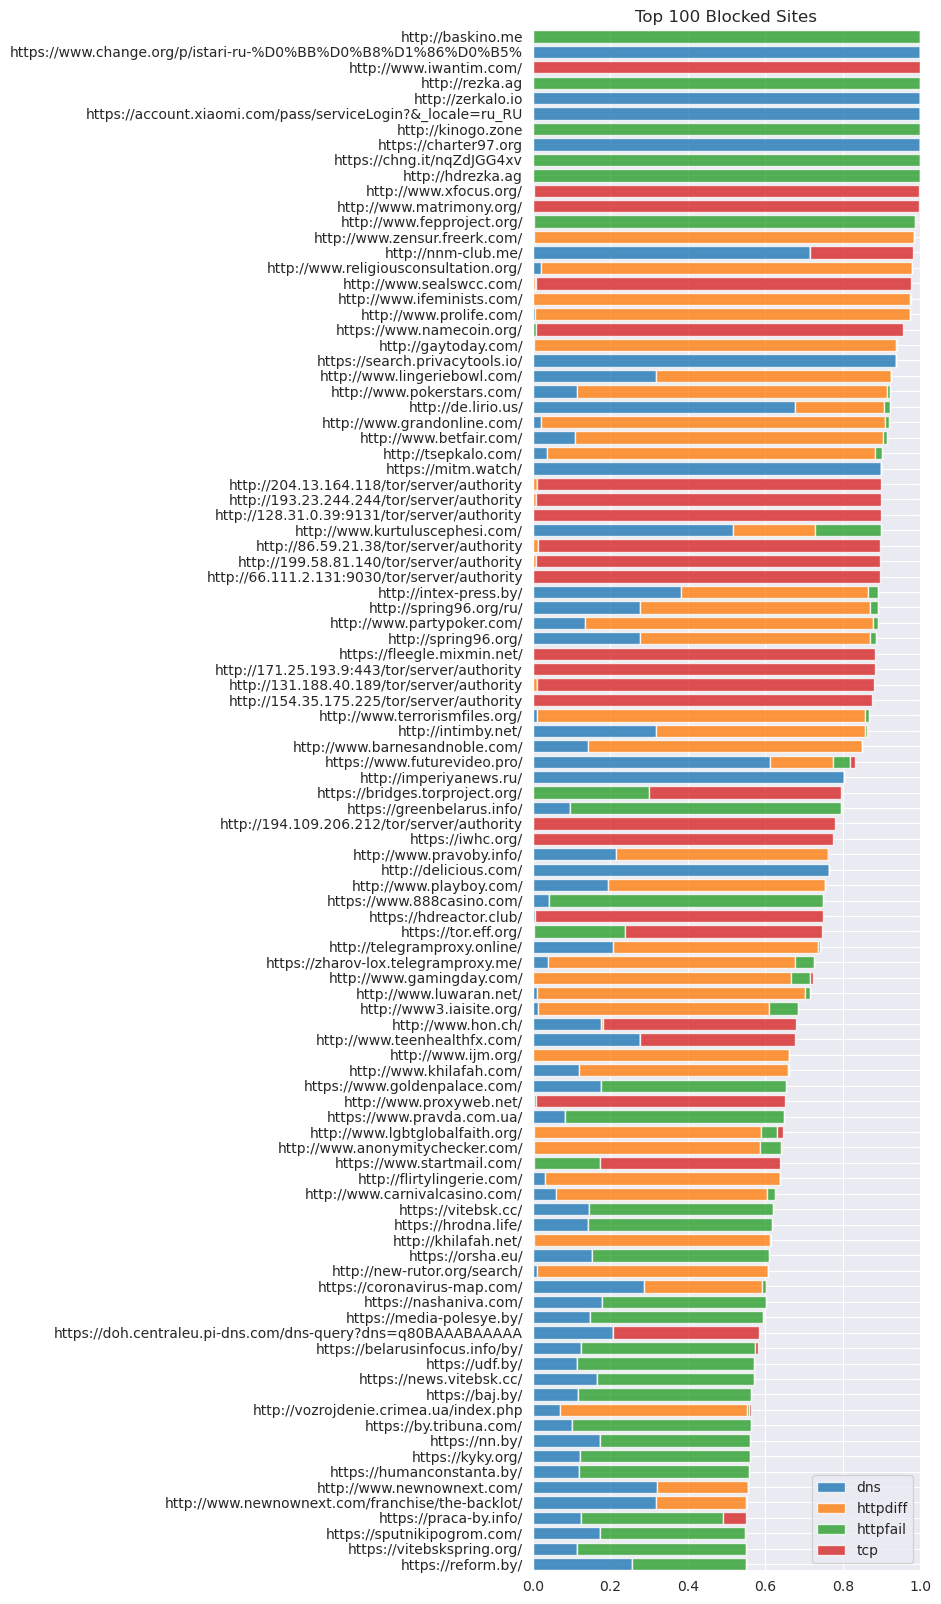

In [19]:
# Plot 
plt.rcParams['figure.figsize'] = [5, 20]
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['dns'].iloc[::-1], label='dns', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['httpdiff'].iloc[::-1], left=c_top_n.iloc[::-1,0], label='httpdiff', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['httpfail'].iloc[::-1], left=c_top_n.iloc[::-1,1], label='httpfail', alpha=0.8)
plt.barh(top_n.index[::-1].str.slice(0,60), top_n['tcp'].iloc[::-1], left=c_top_n.iloc[::-1,2], label='tcp', alpha=0.8)
plt.margins(y=0)
plt.legend()
plt.grid()
plt.title(f'Top {nn} Blocked Sites')